In [41]:
import os
os.chdir('/engram/nklab/hossein/recurrent_models/BLT_models')
!pwd

%matplotlib inline 
import matplotlib.pyplot as plt

import datasets
import pandas as pd
import numpy as np
import csv
import torch
from matplotlib.patches import Rectangle
import torchvision
from PIL import Image
from models.cornet import get_cornet_model
import torch.nn as nn
from collections import OrderedDict
import rsatoolbox
import torch.nn.functional as F

import warnings
warnings.filterwarnings("ignore")

device = 'cuda' if torch.cuda.is_available() else 'cpu'

from analyze_representations import sample_vggface2, calc_rdms, plot_maps, compare_rdms,\
  plot_recurrent_rdms, reduce_dim, plot_dim_reduction_one, sample_FEI_dataset, \
  plot_rdm_mds, load_model_path, load_pretrained_models, extract_features, kasper_dataset

/engram/nklab/hossein/recurrent_models/BLT_models


Number of model parameters: 10002600
blt(
  (conv_input): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (pool_input): BlurPool(
    (pad): ReflectionPad2d((1, 2, 1, 2))
  )
  (output_prenorm_0): Identity()
  (non_lin_0): ReLU(inplace=True)
  (norm_0): GroupNorm(32, 64, eps=1e-05, affine=True)
  (output_0): Identity()
  (conv_0_0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_0_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (output_prenorm_1): Identity()
  (non_lin_1): ReLU(inplace=True)
  (norm_1): GroupNorm(32, 64, eps=1e-05, affine=True)
  (output_1): Identity()
  (conv_1_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_1_2): Sequential(
    (blurpool): BlurPool(
      (pad): ReflectionPad2d((1, 2, 1, 2))
    )
    (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (output_prenorm_2): Identity()
  (non_lin_2): ReLU(inplace=True)
  (norm_2): GroupNorm(3

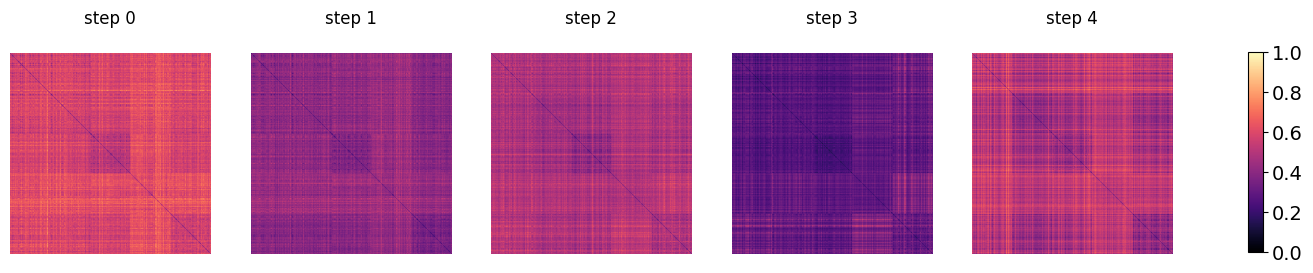

In [42]:
#
model, gap, args = load_model_path('./results/classification/imagenet/blt_bl/run_4/', print_model=True)
imgs, labels = sample_vggface2(num_cats=5, per_cat=150)
layers = ['output_5' ] #, 'V4', 'V2', 'V1']
save = 'rt8_vggface2'
plot_rdm_mds(model, imgs, labels, layers, num_steps=5, plot='rdm', save=None)

In [43]:
inv_normalize = torchvision.transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255],
    std=[1/0.229, 1/0.224, 1/0.255]
)
#inv_tensor = inv_normalize(tensor)

In [44]:
# from datasets.datasets import fetch_data_loaders
# args.distributed = 0
# train_loader, val_loader = fetch_data_loaders(args)
# imgs = next(iter(train_loader))[0]

# #imgs, labels = sample_vggface2(num_cats=5, per_cat=150, split_folder='train')
# plt.imshow(inv_normalize(imgs[63]).movedim(0,-1).cpu().numpy())

### FEI dataset

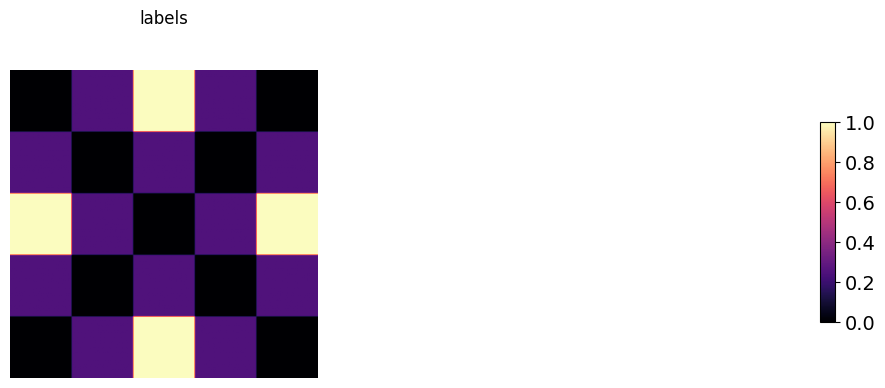

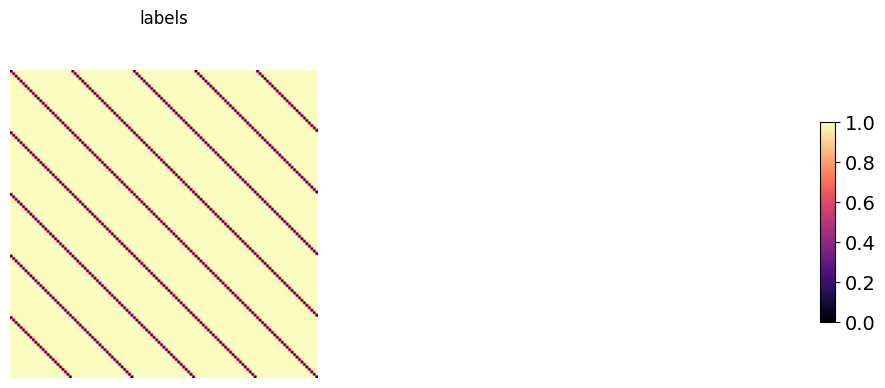

In [45]:
imgs, labels_o, labels_m, labels_i = sample_FEI_dataset(num_ids=25)

labels_o = labels_o.unsqueeze(1)
labels_m = labels_m.unsqueeze(1)
labels = F.one_hot(labels_i)

rdms, rdms_dict = calc_rdms({'labels' : labels_m.float().numpy()}, method='euclidean')
_ = plot_maps(rdms_dict, save='./results/rdms_m')  #'./results/rdms_m'

rdms, rdms_dict = calc_rdms({'labels' : labels.float().numpy()}, method='euclidean')
_ = plot_maps(rdms_dict, save='./results/rdms_i')  #'./results/rdms_i'

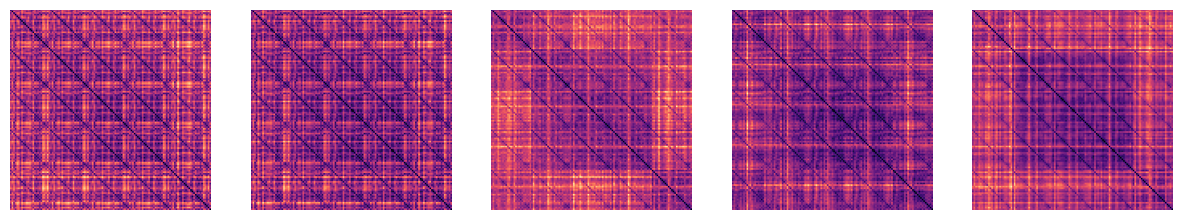

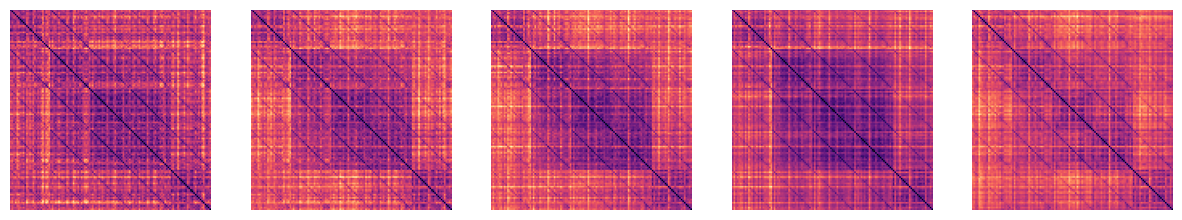

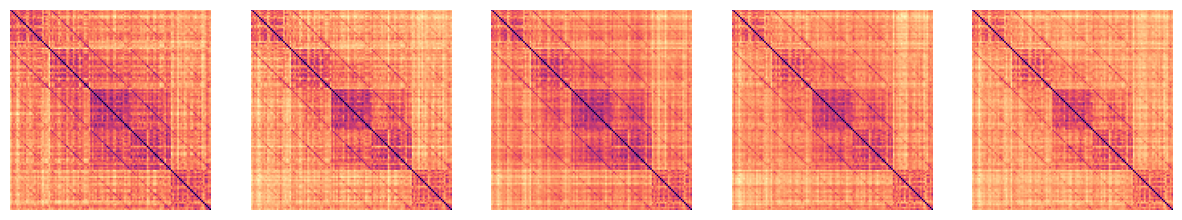

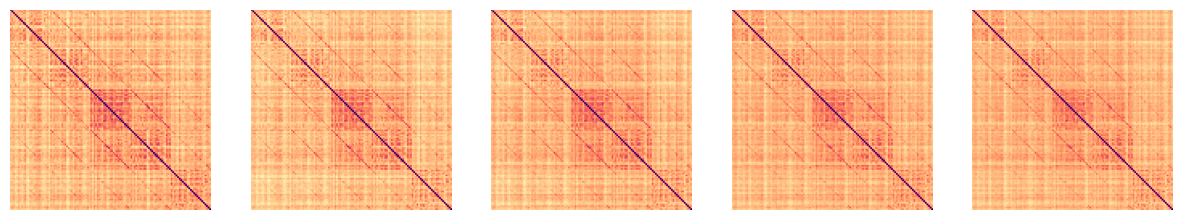

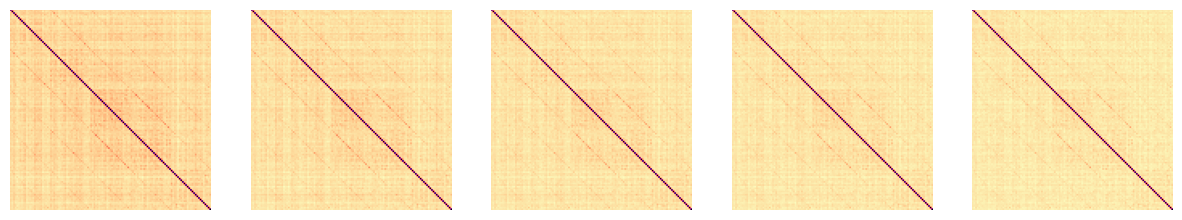

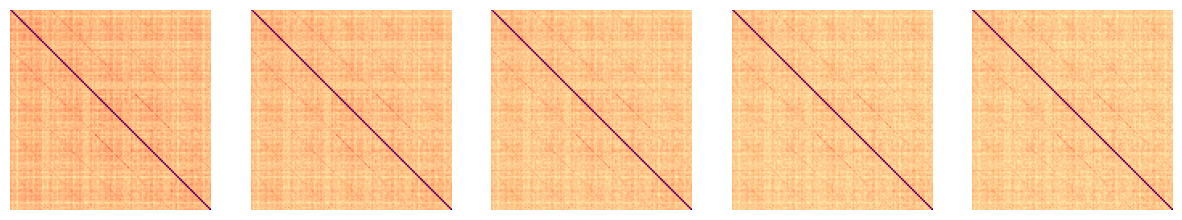

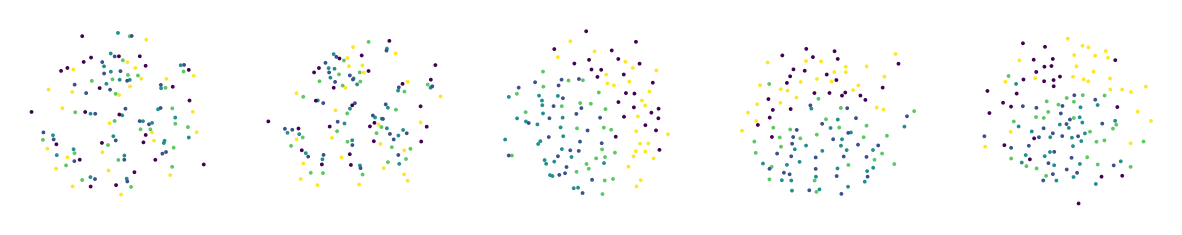

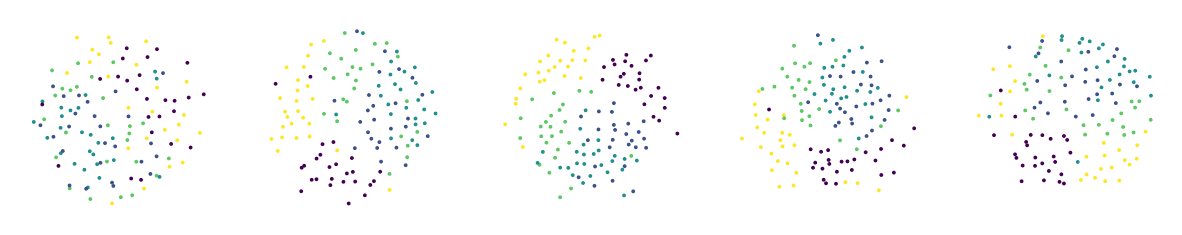

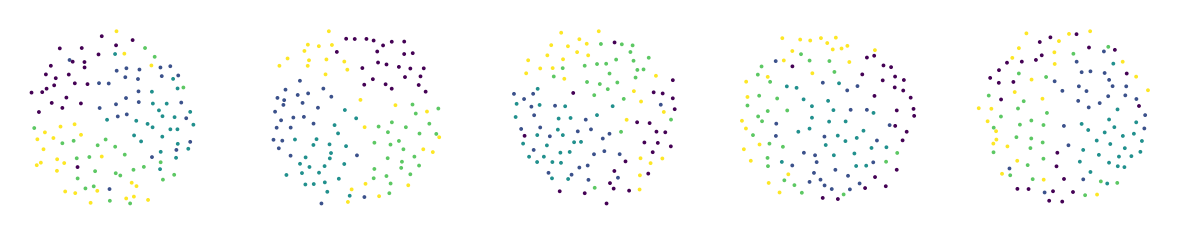

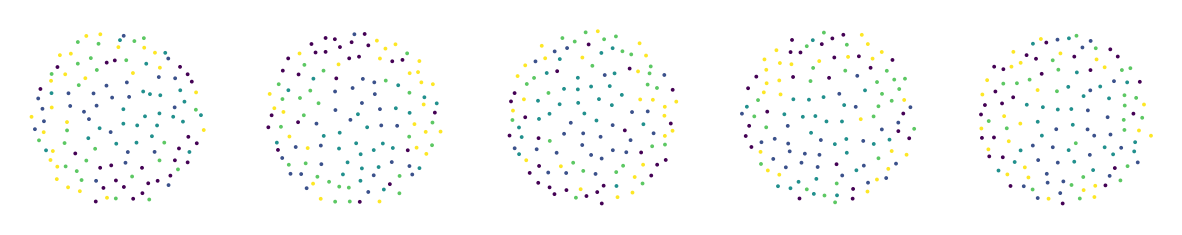

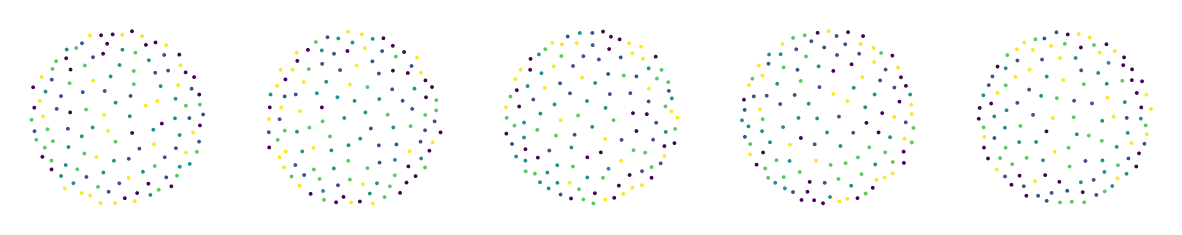

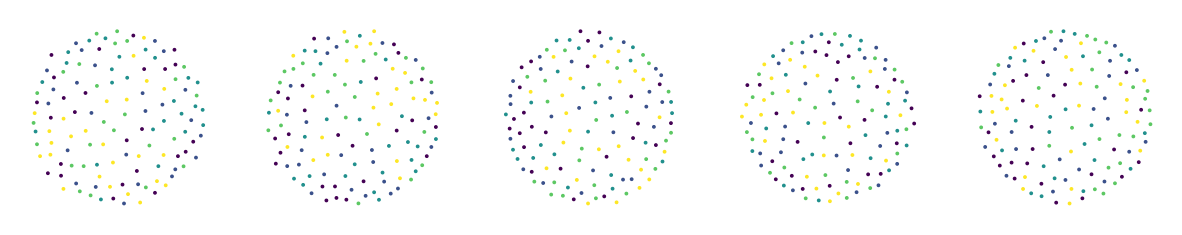

In [46]:
# imgs, labels_o, labels_m, labels_i = sample_FEI_dataset(num_ids=25)
# model, gap = load_model_path('./results/classification/imagenet_face/blt_bl/run_1/', print_model=True)
layers = ['output_5', 'output_4', 'output_3', 'output_2', 'output_1', 'output_0']
# save = None #'blt_bl_imagenet'
plot_rdm_mds(model, imgs, labels_o, layers, num_steps=5, add_text=False, add_bar=False, save=save, format='png')

100%|██████████| 100/100 [00:01<00:00, 52.99it/s]


array([0.0211098 , 0.00865911, 0.27417525, 0.15219313, 0.10658731,
       0.14141029, 0.27892651, 0.26878099, 0.13767527, 0.23300501,
       0.21410314, 0.26830637, 0.19323379, 0.19620693, 0.25469098,
       0.16623209, 0.1566379 , 0.13712426, 0.16212763, 0.16048997,
       0.10300868, 0.10887521, 0.12231913, 0.12327896, 0.12717616,
       0.081309  , 0.08422807, 0.08481868, 0.08498419, 0.08318944])

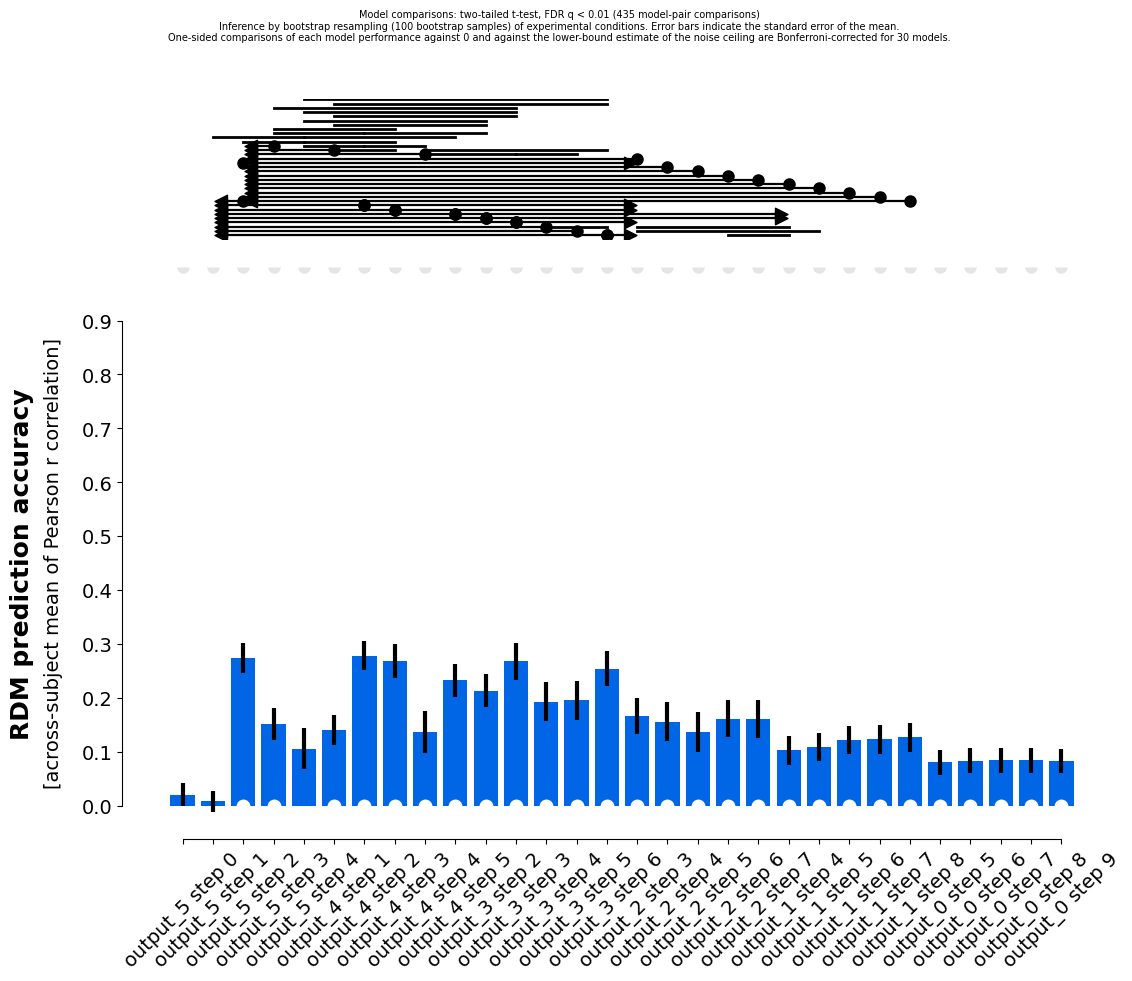

In [47]:
#imgs, labels_o, labels_m, labels_i = sample_FEI_dataset(num_ids=200)
#labels = labels_m.unsqueeze(1).float().numpy()
labels = F.one_hot(labels_m).float().numpy()
#model, gap = load_model_path('../results_new/classification/imagenet_vggface2/blt_b/run_1/')
#layers = ['output_0', 'output_1', 'output_2', 'output_3']
# layers = ['IT', 'V4', 'V2', 'V1']
neuro_data = {'neuro_data':labels}
results, pred_model_names = compare_rdms(model, imgs.to(device), layers, neuro_data, num_steps=5, method='corr')

results.to_dict()['evaluations'].mean(0)